In [1]:
# Import Dependencies

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
# Import and read csv's

GS_2016 = pd.read_csv('resources/GS_q4_2016.csv')
GS_2017 = pd.read_csv('resources/GS_q4_2017.csv')
GS_2018 = pd.read_csv('resources/GS_q4_2018.csv')

In [3]:
# Join 2016 and 2017

GS_2yr_q4 = pd.concat([GS_2016, GS_2017], ignore_index=True)
GS_2yr_q4 = GS_2yr_q4.drop(columns=['Unnamed: 0'])
GS_2yr_q4.to_csv('resources/GS_2yr_q4.csv')
GS_2yr_q4.head()

,Date,Open,High,Low,Close,Volume,Dividend
0,2016-10-03,160.50,161.72,160.250,161.07,2444718.0,0.0
1,2016-10-04,161.24,164.15,161.230,162.27,2469912.0,0.0
2,2016-10-05,163.32,166.57,163.005,166.40,2548215.0,0.0
3,2016-10-06,167.18,167.29,164.820,167.15,2858217.0,0.0
4,2016-10-07,167.50,169.98,166.240,169.83,3390232.0,0.0


In [4]:
# Reshape for regression test

x = GS_2yr_q4.Close.values.reshape(-1, 1)
y = GS_2yr_q4.Open.values.reshape(-1, 1)

print("Shape: ", x.shape, y.shape)
x

Shape:  (126, 1) (126, 1)


array([[161.07],
       [162.27],
       [166.4 ],
       [167.15],
       [169.83],
       [171.04],
       [169.04],
       [169.3 ],
       [167.42],
       [170.52],
       [169.  ],
       [172.63],
       [174.51],
       [174.51],
       [174.67],
       [175.12],
       [175.55],
       [177.07],
       [177.75],
       [177.14],
       [178.24],
       [178.06],
       [176.58],
       [176.21],
       [175.92],
       [181.48],
       [181.92],
       [192.63],
       [200.87],
       [203.94],
       [209.18],
       [211.19],
       [206.26],
       [209.63],
       [210.35],
       [211.08],
       [211.11],
       [212.31],
       [211.38],
       [210.35],
       [211.75],
       [219.29],
       [226.63],
       [223.36],
       [228.55],
       [231.38],
       [235.56],
       [241.45],
       [241.85],
       [237.17],
       [238.55],
       [239.93],
       [243.  ],
       [238.9 ],
       [239.07],
       [243.09],
       [241.44],
       [240.12],
       [240.97

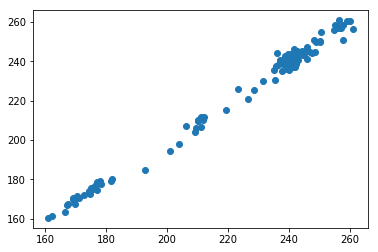

In [5]:
# Plot Scatter Graph

plt.scatter(x, y)

In [6]:
# Fit data to model

GS_2yr_model = LinearRegression()
GS_2yr_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Weight coefficient and y-int

print('Weight coefficients: ', GS_2yr_model.coef_)
print('y-axis intercept: ', GS_2yr_model.intercept_)

Weight coefficients:  [[1.01065842]]
y-axis intercept:  [-2.84482813]


In [8]:
# x and y mins and maxs

GS_2yr_model_x_min = np.array([[x.min()]])
GS_2yr_model_x_max = np.array([[x.max()]])
print(f"Min x Value: {GS_2yr_model_x_min}")
print(f"Max x Value: {GS_2yr_model_x_max}")

GS_2yr_model_y_min = GS_2yr_model.predict(GS_2yr_model_x_min)
GS_2yr_model_y_max = GS_2yr_model.predict(GS_2yr_model_x_max)

Min x Value: [[161.07]]
Max x Value: [[261.01]]


In [1]:
# Show Linear Regression

plt.scatter(x, y, c='blue')
plt.plot([GS_2yr_model_x_min[0], GS_2yr_model_x_max[0]], [GS_2yr_model_x_min[0], GS_2yr_model_x_max[0]], c='red')
plt.savefig('GS_q4_regression.png')

NameError: name 'plt' is not defined

In [10]:
GS_2yr_model.score(x, y)

0.9928145060256937

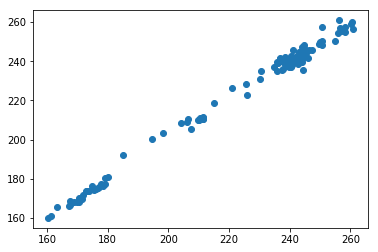

In [11]:
predictions = GS_2yr_model.predict(x)
plt.scatter(y, predictions)

Shape:  (63, 1) (63, 1)


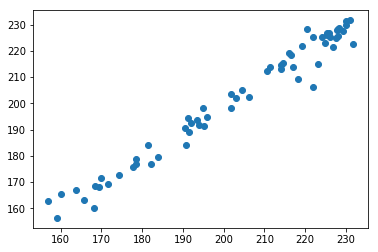

In [13]:
# Now Test predictions against 2018

x1 = GS_2018.Open.values.reshape(-1, 1)
y1 = GS_2018.Close.values.reshape(-1, 1)

print("Shape: ", x1.shape, y1.shape)

# Create scatter plot for 2018

plt.scatter(x1, y1)